In [1]:
import sys  
sys.path.insert(1, '../')
from maploc.osm.viz import Colormap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

%load_ext autoreload
%autoreload 2

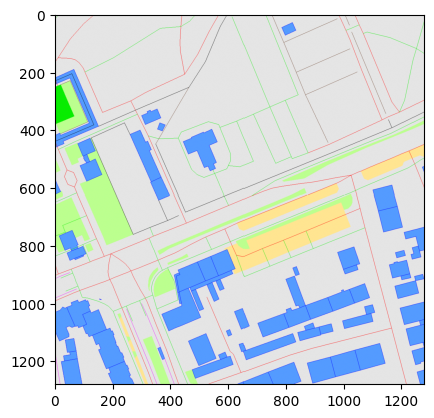

In [101]:
path_tile = "/work/vita/qngo/KITTI/osm_tiles/2011_09_26/2011_09_26_drive_0002_sync/0000000049.npy"
tile = np.load(path_tile)
map_viz = Colormap.apply(tile)
plt.imshow(map_viz)

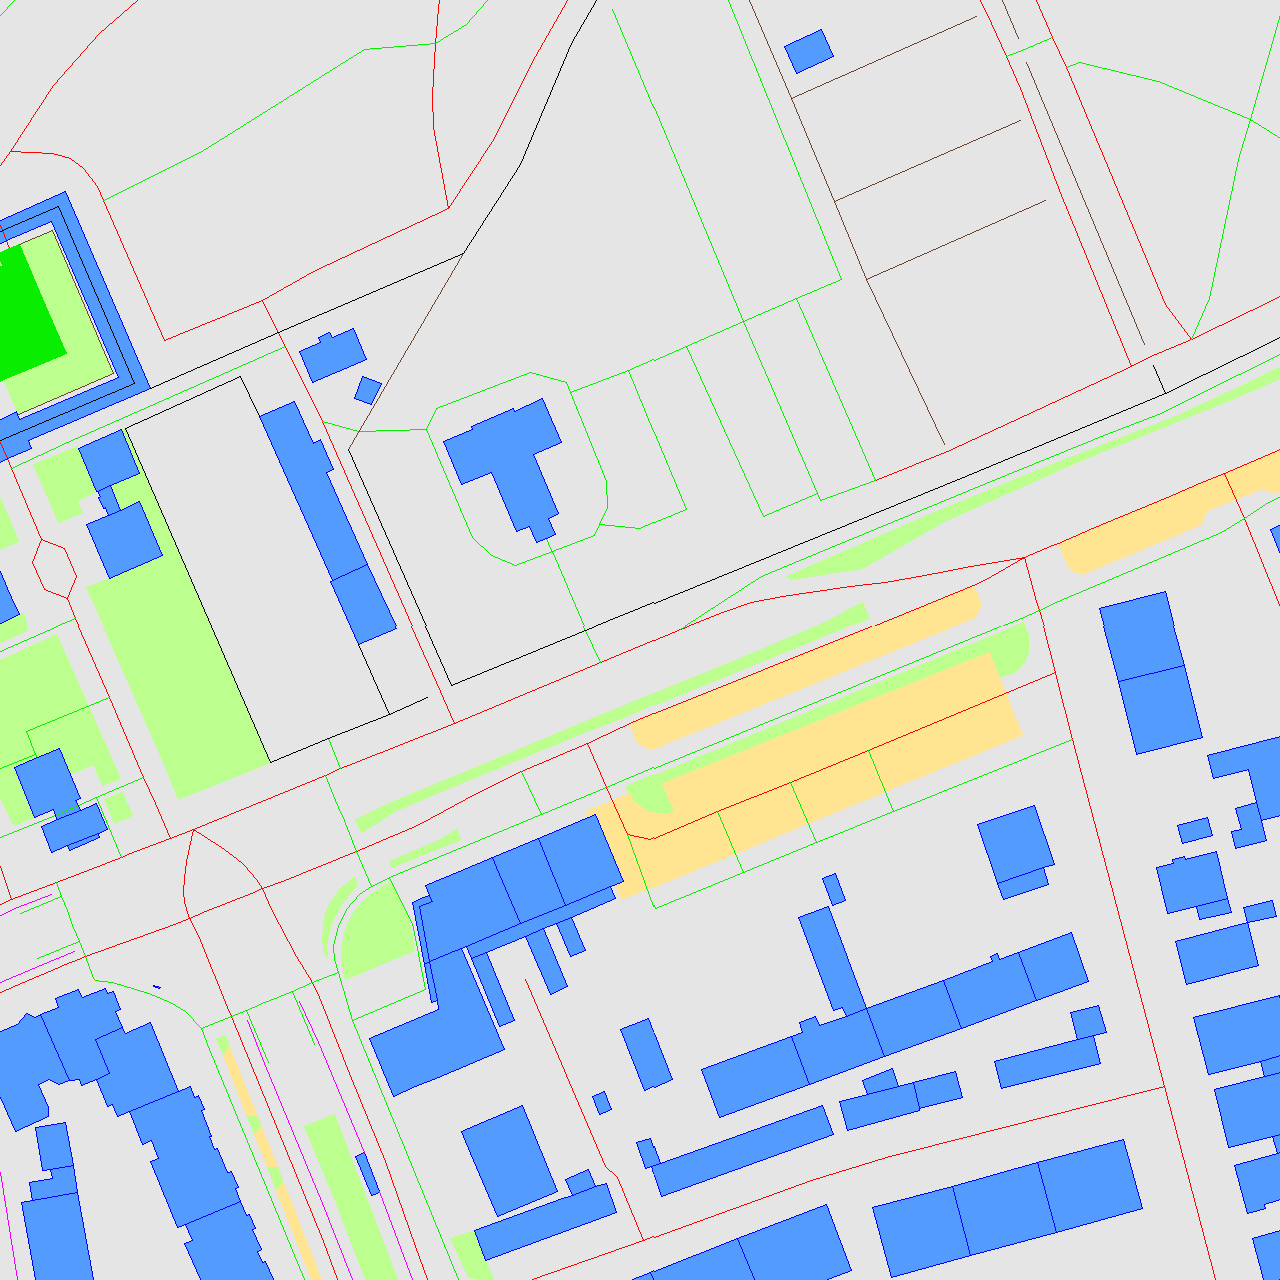

In [102]:
map_viz.max()
PIL_image = Image.fromarray(np.uint8(map_viz*255)).convert('RGB')
PIL_image

(1280, 1280)

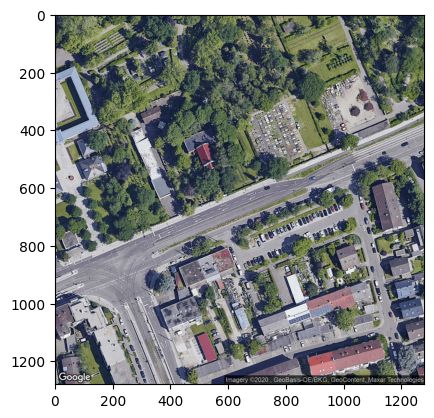

In [104]:
from PIL import Image
path_sat = path_tile.replace("osm_tiles", "satmap").replace("npy", "png")
img = Image.open(path_sat)
# img = img.resize((640, 640))
plt.imshow(img)
img.size

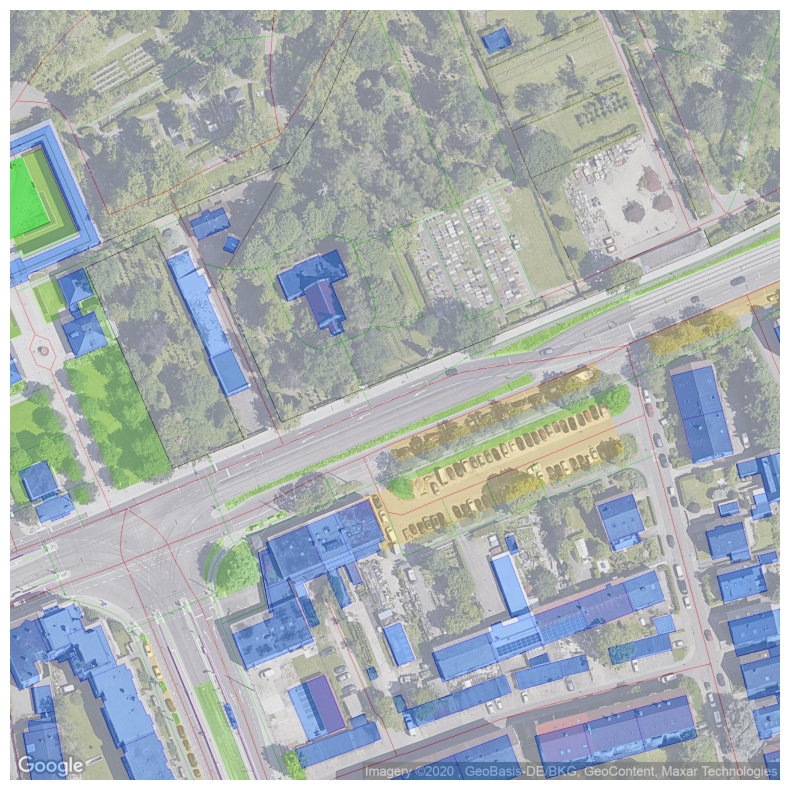

In [105]:
# overlay both images using an alpha
cm = plt.cm.RdBu_r
cm.set_under('white')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img, cmap=cm, vmin=12, alpha=0.9)
ax.imshow(PIL_image, alpha=0.5)
ax.set_axis_off()

# display result
#plt.savefig('plot_output.png')
# plt.figsize((12, 12))
plt.show()

In [74]:
from dual_datasets import KITTIDataset

In [40]:
dataset = KITTIDataset(root="/work/vita/qngo/KITTI", file="../kitti_split/train_files.txt")

In [41]:
dataset[0]

image size  (1280, 1280)


AttributeError: 'KITTIDataset' object has no attribute 'grdimage_transform'

In [8]:
import os

def split_list() -> list[str]:
    return list(
        map(lambda x: os.path.join("../kitti_split", x), os.listdir(os.path.join("../kitti_split")))
    )
split_list()

['../kitti_split/train_files.txt',
 '../kitti_split/test1_files.txt',
 '../kitti_split/test2_files.txt']

In [107]:
Default_lat = 49.015
Satmap_zoom = 18

def get_meter_per_pixel(
    lat=Default_lat,
    zoom=Satmap_zoom,
    scale=1,
):
    meter_per_pixel = 156543.03392 * np.cos(lat * np.pi / 180.0) / (2**zoom)
    meter_per_pixel /= 2  # because use scale 2 to get satmap
    meter_per_pixel /= scale
    return meter_per_pixel

get_meter_per_pixel()*1280

np.float64(250.66049107583785)

In [9]:
from torchvision import transforms
from utils import process_data_augment, process_data, get_data_transforms

_, transform_sat = get_data_transforms()
transform_grd = transforms.Compose(
    [
        transforms.Resize(size=[256, 1024]),  # Different numbers than VIGOR ?
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)


In [11]:
from dual_datasets import KITTIDataset, KITTIDatasetTest
dataset_root = "/work/vita/qngo/KITTI"
train_file = split_list()[0]
ori_noise = 10
kitti = KITTIDataset(
    root=dataset_root,
    file=train_file,
    transform=(transform_grd, transform_sat),
    shift_range_lat=20,
    shift_range_lon=20,
    rotation_range=ori_noise,
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.6051416].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9124069..2.64].


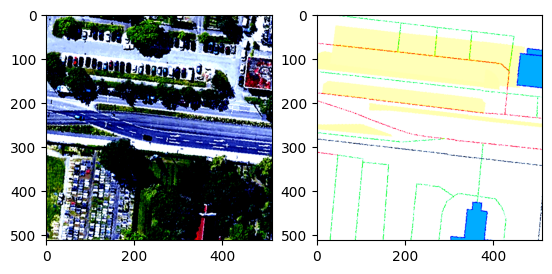

In [22]:
for data in kitti:
    grd, sat, osm, gt, gt_ori, ori_map, city, ori_angle = data
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(sat.permute(1, 2, 0))
    axs[1].imshow(osm.permute(1, 2, 0))
    break